# Linear Regression
- **Dataset**: seaborn.tips
- **Model**: Simple Linear Regression

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Collection

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Understanding the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Note:
- Target variable: tip
- Input variable: total_bill

## 3. Stats Summary

In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 4. Relationship check
- Must confirm relationship before using any model.

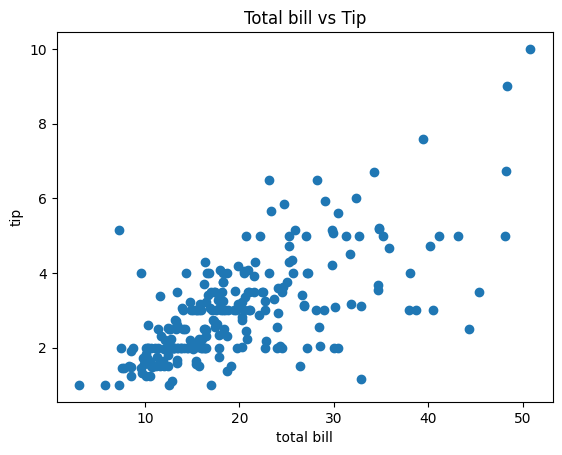

In [5]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total bill vs Tip')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()

### Note:
**Observations**
- Tip amount increases as the Total bill increases.
- Bill amounts are more clustered at range 10-30.
- **Relationship**: Straight Line.

## 5. Feature & Target Separation
**Note**:
- Input is always in **2D** format.
- Target is always in **1D** format.

In [6]:
X = df[['total_bill']] # feature input in 2D only.
y = df['tip']

In [7]:
X.ndim, y.ndim

(2, 1)

## 6. Train - Test Split
**Why?** - To check the model performance on **unseen data**.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 80% - Training
# 20% - Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

## 7. Feature Standardization
**Why?** - 
1. Compare coefficients fairly.
2. Avoid dominance of large values.
3. Prepare of Ridge/Lasso

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Note**:
`fit_transform()`
- Fit only on training data
- Prevents data leakage

## 8. Train Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
print('Coefficients:')
print(f'Slope (m): {model.coef_[0]}')
print(f'Intercept (c): {model.intercept_}')

Coefficients:
Slope (m): 0.9357171400271826
Intercept (c): 3.0877948717948724


In [15]:
y_pred = model.predict(X_test_scaled)

## 9. Model Evaluation

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.5449381659234664


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 0.5688142529229538
RMSE: 0.7541977545199626


## 10. Visualize the best fit line

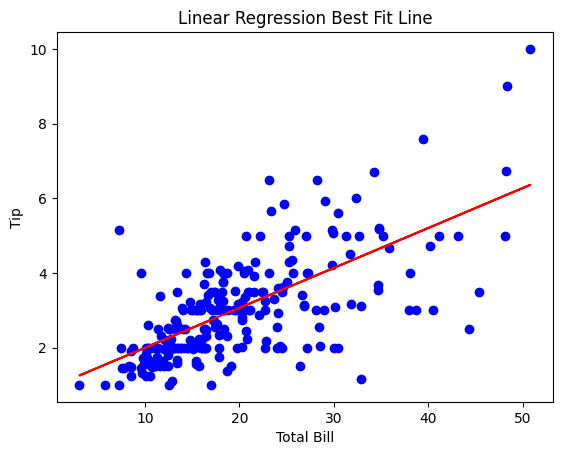

In [20]:
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(scaler.transform(X)), color='red')
plt.title('Linear Regression Best Fit Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

## 11. Input and Output Realtime

In [21]:
bill_amount = float(input('Enter Bill Amount: '))
bill_scaled = scaler.transform([[bill_amount]]) # input always in 2D

tip_pred = model.predict(bill_scaled)
print(f'Predicted Tip Amount: {tip_pred[0]}')

Predicted Tip Amount: 1070.562304085423


c:\Users\KIRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
